## 지도학습 분류 미리보기

In [2]:
# !pip install scikit-learn
# !pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 생선 이진분류 - 도미(bream) or 빙어(smelt)

- 이진분류는 0, 1 로 구분
- 도미야? (1), 빙어야? (0)

In [5]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(bream_length), len(bream_weight)


(35, 35)

In [6]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)


(14, 14)

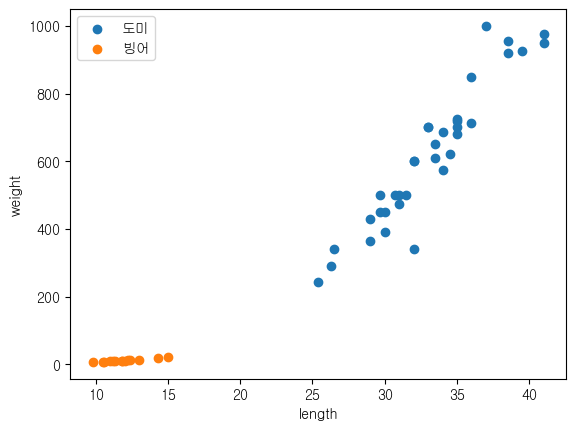

In [7]:
# 산전도
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

#### 데이터 전처리
- 모델이 원하는 형태로 데이터 가공
    - 입력(특성): [길이, 무게] 2차원 배열
    - 결과(정답): 도미 or 빙어 -> 1, 0으로 구성된 1차원 배열

In [8]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
len(fish_length), len(fish_weight)

# 훈련 입력 데이터
train_input = []
# print(list(zip(fish_length, fish_weight))) # 병렬적(각 다른 행의 같은 열을 묶는)으로 묶어주는 내장함수
for l, w in zip(fish_length, fish_weight):
    train_input.append([l, w])

# 훈련 정답 데이터
train_label = [1] * len(bream_length) + [0] * len(smelt_length)
train_label


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### K-최근접 이웃 분류 모델

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier()

# fit(훈련/학습) - score(평가) - predict(예측(분류))
# 최근접 이웃 모델의 훈련은 별도의 연산 없이 모델이 데이터를 로드하면 끝
kn.fit(train_input, train_label)  # 입력 데이터, 정답 데이터
kn.score(train_input, train_label)  # 100% (0~1사이의 값으로 나옴)
kn.predict([[30, 500], [10, 5]])  # [1, 0] 도미다/빙어다



array([1, 0])

In [11]:
# 최근접 이웃 모델의 작동 원리
# - 주어진 데이터와 가장 가까운 k개의 이웃을 찾고, 이웃 데이터를 이용해 예측
# - distances : 모델 데이터포인트와의 거리 (유클리드 거리 측정 방식)
# - index : 모델 데이터포인트의 인덱스
distances, index = kn.kneighbors([[30, 500]])
print(distances)
print(index)

print(np.array(train_input)[index])
print(np.array(train_label)[index])


[[ 0.3         0.7         1.          1.5        25.01999201]]
[[ 6  9 11 12 10]]
[[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]
[[1 1 1 1 1]]


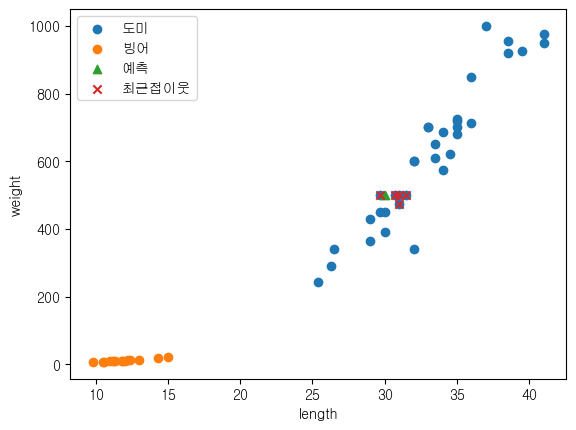

In [12]:
train_input = np.array(train_input) # list 를 튜플로 만들어줘야 아래 index와 함께 쓸 수 있음

# 데이터 분포 확인 산전도
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(30, 500, label='예측', marker='^')
plt.scatter(train_input[index, 0], train_input[index, 1], label='최근접이웃', marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [13]:
# k 개수 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(train_input, train_label)
kn49.score(train_input, train_label)


0.7142857142857143

In [14]:
35/49   # 도미 개수 / 전체 개수

0.7142857142857143

### 훈련데이터-테스트데이터 분리

In [15]:
fish_input = []
for l, w in zip(fish_length, fish_weight):
    fish_input.append([l, w])

fish_label = [1] * len(bream_length) + [0] * len(smelt_length)


In [16]:
# sampling 편향 : 데이터가 한쪽으로 치우친 현상 
# train 데이터는 전부 다 도미, test 데이터는 전부 다 빙어
train_input = fish_input[:35]
train_label = fish_label[:35]    # 1

test_input = fish_input[35:]
test_label = fish_label[35:]    # 0

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.0

In [17]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label)

train_input, test_input, train_label, test_label
sum(train_label), sum(test_label)

(24, 11)

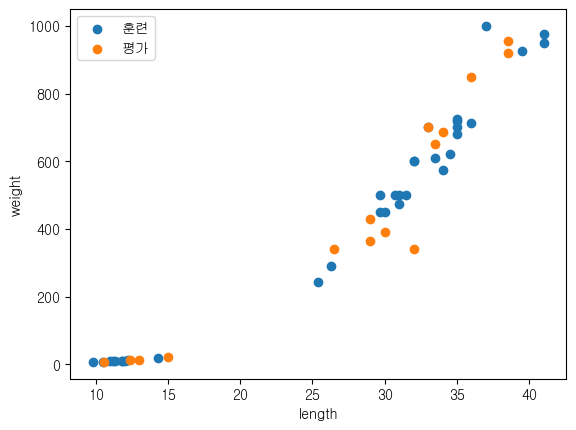

In [18]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 확인 산전도
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(test_input[:, 0],test_input[:, 1], label='평가')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [19]:
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

### 정규화

- 데이터포인트의 값의 범위를 재정의하는 것
    - StandardScaler
    - MinMaxScaler

In [20]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

predict_input = [25, 150]
kn.predict([predict_input])


array([0])

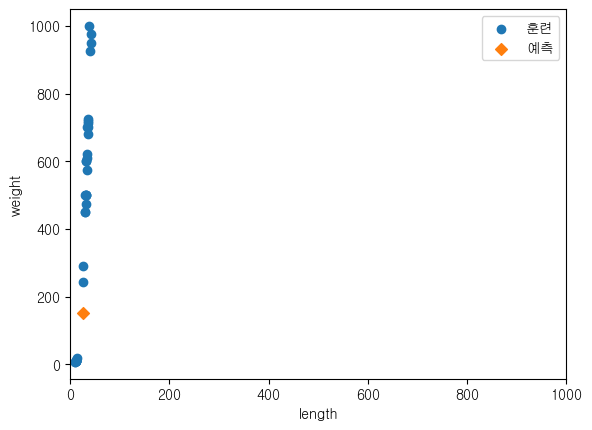

In [21]:
# 데이터 분포 확인 산전도
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
# plt.scatter(test_input[:, 0],test_input[:, 1], label='평가')
plt.scatter(predict_input[0], predict_input[1], label='예측', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.legend()
plt.show()

In [22]:
distances, index = kn.kneighbors([predict_input])
np.array(train_label)[index]


array([[1, 0, 0, 1, 0]])

### 표준 점수(Z-Score)
- Z-Score: 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준 점수 = \frac{데이터포인트 - 평균}{표준편차}
$$

In [23]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

mean, std


(array([ 26.90294118, 444.26470588]), array([ 10.42991978, 324.30761349]))

In [24]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.72839092,  0.54187841],
       [-1.52474242, -1.33997689],
       [ 0.26817645,  0.17185935],
       [ 0.48869588,  0.48020857],
       [ 0.36405446,  0.17185935],
       [-1.44804001, -1.33905184],
       [-1.50556682, -1.33966854],
       [ 0.29693985,  0.01768473],
       [ 1.20778099,  1.48234353],
       [ 0.77632992,  0.78855779],
       [ 0.26817645,  0.01768473],
       [ 0.77632992,  0.86564509],
       [-1.44804001, -1.33936019],
       [-0.14409902, -0.62368165],
       [ 0.39281787,  0.09477204],
       [ 0.68045191,  0.40312126],
       [ 0.77632992,  0.72688794],
       [-1.42886441, -1.33966854],
       [ 0.87220794,  0.83172668],
       [ 0.44075687,  0.17185935],
       [ 0.58457389,  0.78855779],
       [-1.40968881, -1.33226816],
       [-1.20834498, -1.30914196],
       [ 0.96808595,  1.71360545],
       [-0.0578088 , -0.47567402],
       [-1.49597902, -1.34306038],
       [ 1.35159801,  1.55943084],
       [-1.57268143, -1.34676057],
       [-1.63979604,

In [25]:
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.3329864 , -1.33226816],
       [-1.14123037, -1.30852527],
       [ 0.6325129 ,  0.63438318],
       [ 0.58457389,  0.78855779],
       [ 1.11190297,  1.46692607],
       [ 1.11190297,  1.5748483 ],
       [ 0.48869588, -0.32149941],
       [-1.3905132 , -1.32856796],
       [ 0.29693985, -0.1673248 ],
       [ 0.68045191,  0.7423054 ],
       [-1.56309363, -1.34830231],
       [-0.0386332 , -0.32149941],
       [ 0.87220794,  1.25108162],
       [ 0.20106184, -0.25057909],
       [ 0.20106184, -0.04398511]])

In [26]:
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

1.0

In [27]:
# 훈련, 테스트, 예측 데이터 모두 같은 스케일링을 적용해야 함
predict_scaled = (predict_input - mean ) / std
predict_scaled

array([-0.18245022, -0.90736293])

In [28]:
kn.predict([predict_input])

array([1])

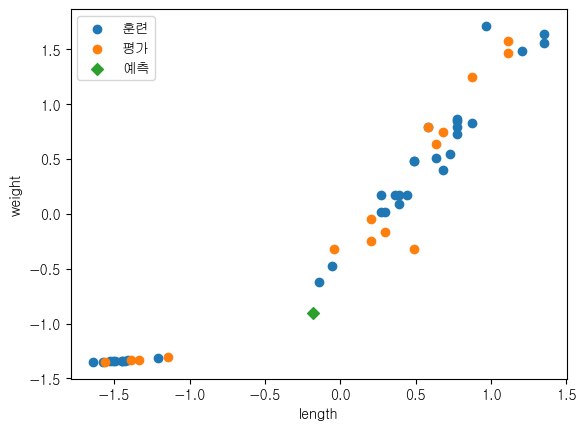

In [29]:
# 데이터 분포 확인 산전도
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련')
plt.scatter(test_scaled[:, 0],test_scaled[:, 1], label='평가')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [30]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(train_input)
train_scaled

array([[ 0.72839092,  0.54187841],
       [-1.52474242, -1.33997689],
       [ 0.26817645,  0.17185935],
       [ 0.48869588,  0.48020857],
       [ 0.36405446,  0.17185935],
       [-1.44804001, -1.33905184],
       [-1.50556682, -1.33966854],
       [ 0.29693985,  0.01768473],
       [ 1.20778099,  1.48234353],
       [ 0.77632992,  0.78855779],
       [ 0.26817645,  0.01768473],
       [ 0.77632992,  0.86564509],
       [-1.44804001, -1.33936019],
       [-0.14409902, -0.62368165],
       [ 0.39281787,  0.09477204],
       [ 0.68045191,  0.40312126],
       [ 0.77632992,  0.72688794],
       [-1.42886441, -1.33966854],
       [ 0.87220794,  0.83172668],
       [ 0.44075687,  0.17185935],
       [ 0.58457389,  0.78855779],
       [-1.40968881, -1.33226816],
       [-1.20834498, -1.30914196],
       [ 0.96808595,  1.71360545],
       [-0.0578088 , -0.47567402],
       [-1.49597902, -1.34306038],
       [ 1.35159801,  1.55943084],
       [-1.57268143, -1.34676057],
       [-1.63979604,

## 다중 분류

In [31]:
df = pd.read_csv('./data/fish.csv')
print(df)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


In [32]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [33]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [35]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [36]:
df[df['Weight'] == 0].index

Index([40], dtype='int64')

In [37]:
df =df.drop(40).reset_index(drop=40)
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


## 데이터 전처리
- 훈련 데이터의 규격: input + label (numpy ndarray)
- 훈련 데이터/테스트(평가) 데이터 분리
- 정규화(컬럼값 사이의 차이를 완화)

In [38]:
# 입력-라벨 데이터 분리
fish_input = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_label = df['Species'].to_numpy()

fish_input.shape, fish_label.shape

((158, 5), (158,))

In [45]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=.10, random_state=0)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((142, 5), (16, 5), (142,), (16,))

In [46]:
# 정규화
standard_scaler = StandardScaler()
standard_scaler.fit(train_input)    # 훈련 데이터 기준 평균/표준편차 작업
train_scaled = standard_scaler.transform(train_input)   # 정규화 반영 -> 훈련 데이터터
test_scaled = standard_scaler.transform(test_input)     # 정규화 반영 -> 테스트 데이터

## 훈련

In [47]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_label)

KNeighborsClassifier(n_neighbors=7)

In [48]:
kn._fit_X

array([[-2.36306956e-01,  6.76343006e-01,  7.08519057e-01,
        -6.71430898e-01,  2.30468738e-02],
       [-5.88599673e-01, -2.83008776e-01, -3.74726203e-01,
        -5.56040991e-01, -3.95072820e-01],
       [ 3.43340885e+00,  3.07472246e+00,  2.92785081e+00,
         1.68844327e-01,  1.07273073e+00],
       [-2.18692320e-01,  4.79675891e-03,  3.96929443e-03,
        -1.96877826e-02,  2.00340601e-01],
       [-7.06030578e-01, -5.22846721e-01, -5.06829283e-01,
        -5.30696954e-01, -6.08934870e-01],
       [ 1.74533958e+00,  1.25195407e+00,  1.33380697e+00,
         2.24118377e+00,  1.43262745e+00],
       [ 1.81873389e+00,  1.15601890e+00,  1.12244204e+00,
         8.00495699e-01,  1.30001508e+00],
       [ 2.04058940e-01,  1.96667115e-01,  3.82664792e-01,
         1.17914249e+00,  2.97100501e-01],
       [-7.94103758e-01, -6.85936524e-01, -6.74159852e-01,
        -6.18380440e-01, -5.66759007e-01],
       [-8.88048482e-01, -8.77806880e-01, -8.41490420e-01,
        -7.54183192e-01

In [49]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

## 평가

In [50]:
kn.score(test_scaled, test_label)

0.875

## 다중분류 작동 방식
- 다중분류 클래스 값의 크기와 같은 배열 형태로 결과를 도출

In [53]:
# 예측 Prediction
kn.predict(test_scaled[5:10])

array(['Perch', 'Perch', 'Perch', 'Perch', 'Perch'], dtype=object)

In [54]:
# 정답 True Label
test_label[5:10]

array(['Perch', 'Perch', 'Pike', 'Perch', 'Perch'], dtype=object)

In [56]:
print(kn.classes_)
kn.predict_proba(test_scaled[5:10])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[0.        , 0.        , 0.85714286, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.        ,
        0.        , 0.28571429],
       [0.        , 0.        , 0.42857143, 0.42857143, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.14285714,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.28571429,
        0.        , 0.        ]])

In [57]:
distance, index = kn.kneighbors(test_scaled[7:8])
distance, index 

(array([[0.91101148, 1.22823945, 1.54569749, 1.58666383, 1.59724465,
         1.68338757, 1.72850434]]),
 array([[115, 131,  73,  50,  77,  84,   6]]))

In [58]:
train_label[index]

array([['Pike', 'Pike', 'Perch', 'Perch', 'Pike', 'Perch', 'Whitefish']],
      dtype=object)